In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

In [2]:
# Veri Kümesini Yükle
df = pd.read_csv("../data/emotion_dataset_raw.csv")
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [3]:
# Value Counts
# Değer Sayımları
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

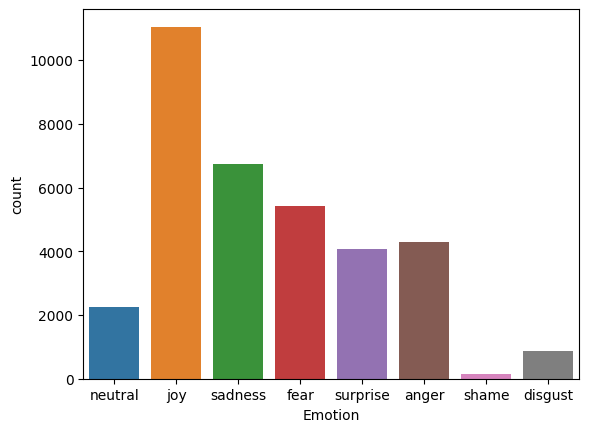

In [4]:
# Plot
sns.countplot(x='Emotion', data=df)

In [5]:
# Data Cleaning
# Veri temizleme
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [6]:
# User handles
# Kullanıcı kolları
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [7]:
# Stopwords
# Engellenecek kelimeler
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [8]:
# Features & Labels
# Özellikler ve Etiketler
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [9]:
# Split Data
# Verileri Böl
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42)

In [10]:
# Build Pipeline
# Ardışık Düzen Oluşturun
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [11]:
# Train and Fit Data
# Verileri Eğit ve Sığdır
pipe_lr.fit(x_train, y_train)
pipe_lr

c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [12]:
# Check Accuracy
# Doğruluğu Kontrol Et
pipe_lr.score(x_test, y_test)

0.619946349875455

In [13]:
# Make A Prediction
# Tahmin Yap
ex1 = "This book was so interesting it made me happy"
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [14]:
# Prediction Prob
# Tahmin Probu
pipe_lr.predict_proba([ex1])

array([[1.60502559e-03, 7.06438941e-03, 6.95658261e-03, 9.43810380e-01,
        1.00440423e-04, 2.63237895e-02, 6.63314609e-05, 1.40730613e-02]])

In [15]:
# To Know the classes
# Sınıfları Bilmek İçin
pipe_lr.classes_


array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [16]:
# Save Model & Pipeline
# Modeli ve Ardışık Düzeni Kaydet
pipeline_file = open("../models/emotion_classifier_pipe_lr.pkl", "wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()

In [17]:
# K-fold Cross Validation
scores = cross_val_score(pipe_lr, Xfeatures, ylabels, cv=5)
print("Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Cross Validation Scores: [0.62207214 0.63083776 0.64213855 0.64544409 0.64041391]
Mean Accuracy: 0.6361812903161583


c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Grid Search
param_grid = {'cv__ngram_range': [(1, 1), (1, 2)],
              'lr__C': [0.1, 1, 10]}
grid_search = GridSearchCV(pipe_lr, param_grid, cv=5)
grid_search.fit(Xfeatures, ylabels)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best Parameters: {'cv__ngram_range': (1, 2), 'lr__C': 1}
Best Score: 0.6489140950851581


c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Prediction on Test Set
y_pred = pipe_lr.predict(x_test)

In [20]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       anger       0.62      0.55      0.59      1283
     disgust       0.62      0.18      0.28       292
        fear       0.74      0.65      0.69      1645
         joy       0.62      0.75      0.67      3311
     neutral       0.59      0.73      0.65       675
     sadness       0.58      0.57      0.57      2015
       shame       0.82      0.78      0.80        36
    surprise       0.55      0.43      0.48      1181

    accuracy                           0.62     10438
   macro avg       0.64      0.58      0.59     10438
weighted avg       0.62      0.62      0.61     10438



In [21]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 708    8   66  227   75  158    1   40]
 [  35   53   26   87    7   56    1   27]
 [  80    5 1069  237   39  137    0   78]
 [ 110    7  129 2468  130  293    1  173]
 [  16    1   12   93  492   53    0    8]
 [ 125    6   95  490   65 1146    2   86]
 [   1    0    1    4    1    1   28    0]
 [  58    5   46  399   25  140    1  507]]


In [22]:
# Multiple Models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

In [23]:
# Train and Evaluate Multiple Models
for name, model in models:
    pipe = Pipeline(steps=[('cv', CountVectorizer()), ('model', model)])
    pipe.fit(x_train, y_train)
    score = pipe.score(x_test, y_test)
    print(f"{name} Accuracy: {score}")


c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.619946349875455
Multinomial Naive Bayes Accuracy: 0.5745353515999233
Random Forest Accuracy: 0.5865108258287028
Support Vector Machine Accuracy: 0.615443571565434


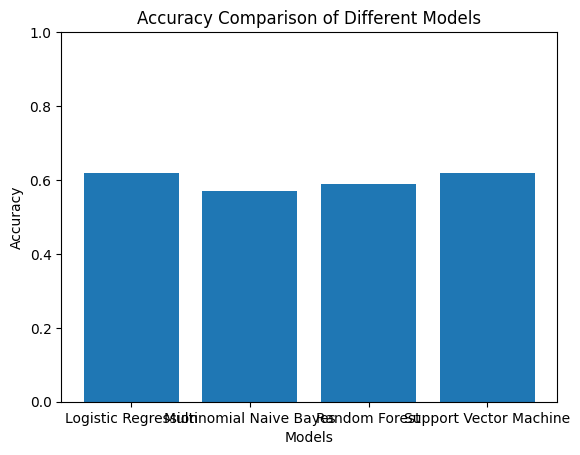

In [24]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Multinomial Naive Bayes', 'Random Forest', 'Support Vector Machine']
accuracies = [0.62, 0.57, 0.59, 0.62]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Y ekseni sınırlarını 0-1 aralığına ayarla
plt.show()

## İngilizce
### These values represent the performance of the classification model. Metrics such as precision, recall, and f1-score are provided for each emotion class. Additionally, the accuracy value is also specified.

### Interpreting these metrics helps evaluate the performance of the model. For example, for the "joy" class, the precision is 0.62, recall is 0.75, and f1-score is 0.67. This indicates a relatively good prediction performance for the "joy" class.

### The confusion matrix shows the comparison between the actual and predicted classes. For instance, in cell (0, 0), there are 708 correct predictions of "anger," while in cell (1, 2), 26 instances of the "fear" label were incorrectly predicted as "disgust."

### The performance of different classification models is also compared. For example, the Logistic Regression model has an accuracy value of 0.62.

### In conclusion, when evaluating the model's performance, it can be observed that different levels of success are achieved for each emotion class, and some classes are better predicted than others.

## Türkçe
### Bu değerler, sınıflandırma modelinin performansını göstermektedir. Her bir duygu sınıfı için precision, recall ve f1-score gibi metrikler verilmiştir. Ayrıca, accuracy (doğruluk) değeri de belirtilmiştir.

### Bu metriklerin yorumlanması modelin performansını değerlendirmeye yardımcı olur. Örneğin, "joy" sınıfı için precision 0.62, recall 0.75 ve f1-score 0.67 olarak görünmektedir. Bu, "joy" sınıfı için nispeten iyi bir tahmin performansı olduğunu gösterir.

### Confusion matrix ise gerçek ve tahmin edilen sınıflar arasındaki karşılaştırmayı gösterir. Örneğin, (0, 0) hücresinde 708 doğru "anger" tahmini, (1, 2) hücresinde 26 "fear" etiketi yanlış olarak "disgust" olarak tahmin edilmiştir.

### Farklı sınıflandırıcı modellerin performansı da karşılaştırılmıştır. Örneğin, Logistic Regression modelinin doğruluk değeri 0.62 olarak belirtilmiştir.

### Sonuç olarak, modelin performansı değerlendirildiğinde, her bir duygu sınıfı için farklı bir başarı elde edildiği ve bazı sınıfların diğerlerine göre daha iyi tahmin edildiği görülmektedir.